# Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

## Part A

The method we will use is known as inverse transform sampling. Suppose the distribution we wish to obtain has a cumulative distribution function $F(x)$. Our goal is to generate random events $X=T(u)$ (where $u$ is uniform between 0 and 1) such that

$$F(x) = \text{Prob}(X<x) = \text{Prob}(T(u)<x) = \text{Prob}(u<T^{-1}(x)) = T^{-1}(x) $$

This occurs precisely when $T=F^{-1}$. It follows that if we uniform events $u$, plug them into $F^{-1}(u)$ then they will have a probability distribution given by $f(x)$ (where f(x)=F'(x)).

## Part B

We have

$$\bar{s}=\int_0^1 sw(s)ds = \int_0^1 2s-2s^2 ds = \frac{1}{3} $$

$$(\Delta s)^2 = \bar{(s-\bar{s})^2} = \bar{s^2} - \bar{s}^2 = \int_0^1 s^2w(s)ds - \left[ \int_0^1 sw(s)ds \right]^2 =  \int_0^1 2s^2 - 2s^3 ds - \left(\frac{1}{3}\right)^2 = \frac{1}{18} $$

It follows that

$$\boxed{\bar{s} = \frac{1}{3} \hspace{5mm} \Delta s = \frac{1}{\sqrt{18}}} $$

## Part C

Our probability density function is $w(s)=2-2s$ so our cumulative distribution function is $W(s)=2s-s^2$. The inverse is obtained using

$$s^2-2s+W=0 \implies s=\frac{2 \pm \sqrt{4-4W}}{2} = 1 \pm \sqrt{1-W}$$

In terms of how we defined things in part a), this gives

$$T(u)=1 \pm \sqrt{1-u} $$

but we must take the negative sign to ensure that, for example $T(0)$ lies in the range $(0, 1)$.

$$T(u)=1-\sqrt{1-u} $$

In [2]:
def rand_step():
    return 1-np.sqrt(1-np.random.rand())

Lets do a plot to make sure these values really are distributed as we calculated above.

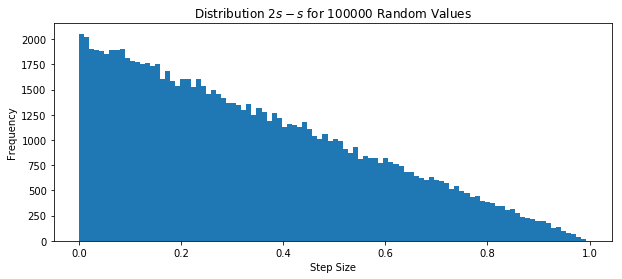

In [3]:
x = np.array([rand_step() for i in range(100000)])

fig, ax = plt.subplots(figsize=(10,4))
ax.hist(x, bins=100)
ax.set_title(r'Distribution $2s-s$ for 100000 Random Values')
ax.set_xlabel('Step Size')
ax.set_ylabel('Frequency')
plt.show()

Now lets produce 500 random walks of 30 steps total.

In [4]:
def rand_walk(N):
    walk = 0
    for i in range(N):
        walk += rand_step()
    return walk

In [5]:
N = 30
Walkers = 500

step_distrib = np.array([rand_walk(N) for i in range(Walkers)])

The mean $\bar{x}$ and variance $\Delta x$ are given by

In [6]:
mean = np.mean(step_distrib)
std = np.std(step_distrib)

display(Math("\overline{x}="+str(round(mean, 3))))
display(Math("\Delta{x}="+str(round(std, 3))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Theoretical Values**

Equation 1.9.3 and 1.9.12 say that $\bar{x}=N\bar{s}$ and $\bar{\Delta x} = \sqrt{N} \bar{\Delta s}$. This yields

$$\bar{x}=30 \cdot \left( \frac{1}{3} \right)=10 $$
$$ \bar{\Delta x} = \sqrt{30} \left(\frac{1}{\sqrt{18}}\right) = 1.291 $$

Thus the results of the simulation agree completely with the theory.